In [1]:
"""
LABORATORIO 1: MANIPULACIÓN TEMPORAL BÁSICA
Sesión 12: Series Temporales en Pandas

Objetivo: Dominar la manipulación de datos temporales con DatetimeIndex
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configuración para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("=" * 80)
print("LABORATORIO 1: MANIPULACIÓN TEMPORAL BÁSICA")
print("=" * 80)

LABORATORIO 1: MANIPULACIÓN TEMPORAL BÁSICA


In [2]:
# =============================================================================
# EJERCICIO 1: CARGAR Y PREPARAR DATOS TEMPORALES
# =============================================================================

print("\n1. CARGANDO DATOS DE PRODUCCIÓN HISTÓRICA...")
print("-" * 50)

# Cargar datos de producción
df_produccion = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_12/datos/produccion_historica.csv')

print(f"Forma del dataset: {df_produccion.shape}")
print(f"Columnas disponibles: {list(df_produccion.columns)}")
print(f"Tipos de datos:\n{df_produccion.dtypes}")

# Mostrar las primeras filas
print("\nPrimeras 5 filas:")
print(df_produccion.head())


1. CARGANDO DATOS DE PRODUCCIÓN HISTÓRICA...
--------------------------------------------------
Forma del dataset: (124, 9)
Columnas disponibles: ['fecha', 'pozo_id', 'campo', 'produccion_bpd', 'presion_psi', 'temperatura_f', 'agua_porcentaje', 'gas_porcentaje', 'estado_pozo']
Tipos de datos:
fecha              object
pozo_id            object
campo              object
produccion_bpd      int64
presion_psi         int64
temperatura_f       int64
agua_porcentaje     int64
gas_porcentaje      int64
estado_pozo        object
dtype: object

Primeras 5 filas:
                 fecha pozo_id        campo  produccion_bpd  presion_psi  \
0  2023-01-01 00:00:00   PZ001  Campo Norte            1250         1850   
1  2023-01-01 06:00:00   PZ001  Campo Norte            1280         1870   
2  2023-01-01 12:00:00   PZ001  Campo Norte            1320         1890   
3  2023-01-01 18:00:00   PZ001  Campo Norte            1290         1860   
4  2023-01-02 00:00:00   PZ001  Campo Norte            131

In [3]:
# =============================================================================
# EJERCICIO 2: CONVERTIR A DATETIMEINDEX
# =============================================================================

print("\n\n2. CONVERTIENDO A DATETIMEINDEX...")
print("-" * 50)

# Convertir la columna fecha a datetime
df_produccion['fecha'] = pd.to_datetime(df_produccion['fecha'])

# Establecer fecha como índice
df_produccion.set_index('fecha', inplace=True)

print("Índice temporal creado:")
print(f"Tipo de índice: {type(df_produccion.index)}")
print(f"Rango temporal: {df_produccion.index.min()} a {df_produccion.index.max()}")
print(f"Frecuencia de datos: {df_produccion.index.freq}")

# Mostrar información del DataFrame
print("\nInformación del DataFrame:")
print(df_produccion.info())



2. CONVERTIENDO A DATETIMEINDEX...
--------------------------------------------------
Índice temporal creado:
Tipo de índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Rango temporal: 2023-01-01 00:00:00 a 2023-01-31 18:00:00
Frecuencia de datos: None

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2023-01-01 00:00:00 to 2023-01-31 18:00:00
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pozo_id          124 non-null    object
 1   campo            124 non-null    object
 2   produccion_bpd   124 non-null    int64 
 3   presion_psi      124 non-null    int64 
 4   temperatura_f    124 non-null    int64 
 5   agua_porcentaje  124 non-null    int64 
 6   gas_porcentaje   124 non-null    int64 
 7   estado_pozo      124 non-null    object
dtypes: int64(5), object(3)
memory usage: 8.7+ KB
None


In [4]:
# =============================================================================
# EJERCICIO 3: SELECCIÓN TEMPORAL BÁSICA
# =============================================================================

print("\n\n3. SELECCIÓN TEMPORAL BÁSICA...")
print("-" * 50)

# Seleccionar datos de una fecha específica
print("Datos del 15 de enero de 2023:")
fecha_especifica = df_produccion.loc['2023-01-15']
print(f"Registros en la fecha: {len(fecha_especifica)}")
print(fecha_especifica)

# Seleccionar rango de fechas
print("\nDatos del 10 al 15 de enero:")
rango_fechas = df_produccion.loc['2023-01-10':'2023-01-15']
print(f"Registros en el rango: {len(rango_fechas)}")
print(rango_fechas.head())

# Seleccionar por mes
print("\nDatos de enero de 2023:")
datos_enero = df_produccion.loc['2023-01']
print(f"Registros en enero: {len(datos_enero)}")
print(datos_enero.head())



3. SELECCIÓN TEMPORAL BÁSICA...
--------------------------------------------------
Datos del 15 de enero de 2023:
Registros en la fecha: 4
                    pozo_id        campo  produccion_bpd  presion_psi  \
fecha                                                                   
2023-01-15 00:00:00   PZ001  Campo Norte            1830         2270   
2023-01-15 06:00:00   PZ001  Campo Norte            1860         2290   
2023-01-15 12:00:00   PZ001  Campo Norte            1880         2310   
2023-01-15 18:00:00   PZ001  Campo Norte            1850         2280   

                     temperatura_f  agua_porcentaje  gas_porcentaje  \
fecha                                                                 
2023-01-15 00:00:00            187               42               0   
2023-01-15 06:00:00            189               44               0   
2023-01-15 12:00:00            191               45               0   
2023-01-15 18:00:00            188               43              

In [5]:
# =============================================================================
# EJERCICIO 4: OPERACIONES TEMPORALES AVANZADAS
# =============================================================================

print("\n\n4. OPERACIONES TEMPORALES AVANZADAS...")
print("-" * 50)

# Obtener componentes temporales

print("Componentes temporales agregados:")
df_produccion['año'] = df_produccion.index.year
df_produccion['mes'] = df_produccion.index.month
df_produccion['dia'] = df_produccion.index.day
df_produccion['hora'] = df_produccion.index.hour
df_produccion['dia_semana'] = df_produccion.index.dayofweek
print(df_produccion[['año', 'mes', 'dia', 'hora', 'dia_semana', 'produccion_bpd']].head())

# Calcular estadísticas por día de la semana
print("\nProducción promedio por día de la semana:")
produccion_por_dia = df_produccion.groupby('dia_semana')['produccion_bpd'].mean()
produccion_por_dia.index = produccion_por_dia.index.map({0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'})
print(produccion_por_dia)

# Calcular estadísticas por hora del día
print("\nProducción promedio por hora del día:")
produccion_por_hora = df_produccion.groupby('hora')['produccion_bpd'].mean()
print(produccion_por_hora)



4. OPERACIONES TEMPORALES AVANZADAS...
--------------------------------------------------
Componentes temporales agregados:
                      año  mes  dia  hora  dia_semana  produccion_bpd
fecha                                                                
2023-01-01 00:00:00  2023    1    1     0           6            1250
2023-01-01 06:00:00  2023    1    1     6           6            1280
2023-01-01 12:00:00  2023    1    1    12           6            1320
2023-01-01 18:00:00  2023    1    1    18           6            1290
2023-01-02 00:00:00  2023    1    2     0           0            1310

Producción promedio por día de la semana:
dia_semana
Lunes        1895.0
Martes       1935.0
Miércoles    1835.0
Jueves       1875.0
Viernes      1915.0
Sábado       1955.0
Domingo      1853.0
Name: produccion_bpd, dtype: float64

Producción promedio por hora del día:
hora
0     1869.354839
6     1899.354839
12    1920.000000
18    1890.000000
Name: produccion_bpd, dtype: float64


In [6]:
# =============================================================================
# EJERCICIO 5: FILTRADO TEMPORAL CONDICIONAL
# =============================================================================

print("\n\n5. FILTRADO TEMPORAL CONDICIONAL...")
print("-" * 50)

# Filtrar datos de la primera semana
primera_semana = df_produccion[df_produccion.index < '2023-01-08']
print(f"Datos de la primera semana: {len(primera_semana)} registros")

# Filtrar datos de las horas de mayor producción (6:00 y 12:00)
horas_pico = df_produccion[(df_produccion.index.hour == 6) | (df_produccion.index.hour == 12)]
print(f"Datos de horas pico (6:00 y 12:00): {len(horas_pico)} registros")

# Filtrar datos de los fines de semana (sábado=5, domingo=6)
fines_semana = df_produccion[df_produccion.index.dayofweek >= 5]
print(f"Datos de fines de semana: {len(fines_semana)} registros")



5. FILTRADO TEMPORAL CONDICIONAL...
--------------------------------------------------
Datos de la primera semana: 28 registros
Datos de horas pico (6:00 y 12:00): 62 registros
Datos de fines de semana: 36 registros


In [7]:
# =============================================================================
# EJERCICIO 6: ANÁLISIS DE TENDENCIAS TEMPORALES
# =============================================================================

print("\n\n6. ANÁLISIS DE TENDENCIAS TEMPORALES...")
print("-" * 50)

# Calcular producción total por día
print("Producción total por día:")
produccion_diaria = df_produccion['produccion_bpd'].resample('D').sum()
print(produccion_diaria.head(10))

# Calcular producción promedio por día
print("\nProducción promedio por día:")
produccion_promedio_diaria = df_produccion['produccion_bpd'].resample('D').mean()
print(produccion_promedio_diaria.head(10))

# Calcular estadísticas por semana
print("\nEstadísticas semanales de producción:")
produccion_semanal = df_produccion.resample('W').agg({
    'produccion_bpd': ['mean', 'sum', 'std', 'min', 'max'],
})
print(produccion_semanal)





6. ANÁLISIS DE TENDENCIAS TEMPORALES...
--------------------------------------------------
Producción total por día:
fecha
2023-01-01    5140
2023-01-02    5340
2023-01-03    5500
2023-01-04    5660
2023-01-05    5820
2023-01-06    5980
2023-01-07    6140
2023-01-08    6300
2023-01-09    6460
2023-01-10    6620
Freq: D, Name: produccion_bpd, dtype: int64

Producción promedio por día:
fecha
2023-01-01    1285.0
2023-01-02    1335.0
2023-01-03    1375.0
2023-01-04    1415.0
2023-01-05    1455.0
2023-01-06    1495.0
2023-01-07    1535.0
2023-01-08    1575.0
2023-01-09    1615.0
2023-01-10    1655.0
Freq: D, Name: produccion_bpd, dtype: float64

Estadísticas semanales de producción:
           produccion_bpd                              
                     mean    sum        std   min   max
fecha                                                  
2023-01-01         1285.0   5140  28.867513  1250  1320
2023-01-08         1455.0  40740  83.510922  1310  1600
2023-01-15         1735.0  485



7. VISUALIZACIÓN TEMPORAL BÁSICA...
--------------------------------------------------


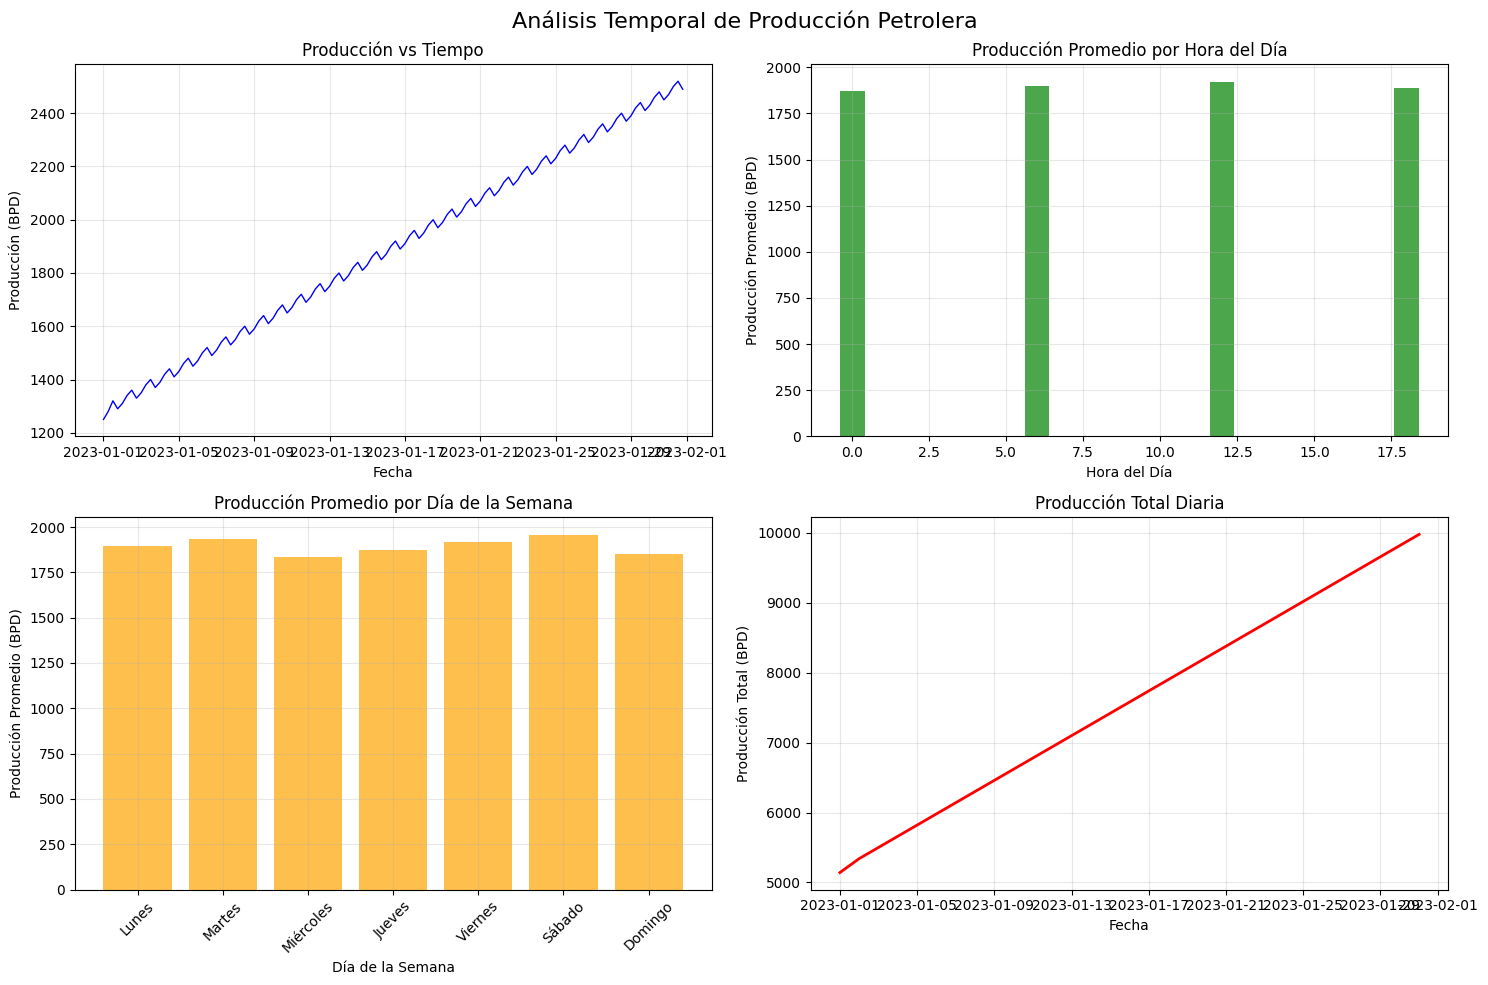

In [8]:
# =============================================================================
# EJERCICIO 7: VISUALIZACIÓN TEMPORAL BÁSICA
# =============================================================================

print("\n\n7. VISUALIZACIÓN TEMPORAL BÁSICA...")
print("-" * 50)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis Temporal de Producción Petrolera', fontsize=16)

# Gráfico 1: Producción a lo largo del tiempo
axes[0, 0].plot(df_produccion.index, df_produccion['produccion_bpd'], 'b-', linewidth=1)
axes[0, 0].set_title('Producción vs Tiempo')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Producción (BPD)')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Producción por hora del día
produccion_por_hora_plot = df_produccion.groupby('hora')['produccion_bpd'].mean()
axes[0, 1].bar(produccion_por_hora_plot.index, produccion_por_hora_plot.values, color='green', alpha=0.7)
axes[0, 1].set_title('Producción Promedio por Hora del Día')
axes[0, 1].set_xlabel('Hora del Día')
axes[0, 1].set_ylabel('Producción Promedio (BPD)')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Producción por día de la semana
produccion_por_dia_plot = df_produccion.groupby('dia_semana')['produccion_bpd'].mean()
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
axes[1, 0].bar(range(7), produccion_por_dia_plot.values, color='orange', alpha=0.7)
axes[1, 0].set_title('Producción Promedio por Día de la Semana')
axes[1, 0].set_xlabel('Día de la Semana')
axes[1, 0].set_ylabel('Producción Promedio (BPD)')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(dias_semana, rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Producción diaria agregada
axes[1, 1].plot(produccion_diaria.index, produccion_diaria.values, 'r-', linewidth=2)
axes[1, 1].set_title('Producción Total Diaria')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Producción Total (BPD)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# =============================================================================
# EJERCICIO 8: ANÁLISIS DE PATRONES TEMPORALES
# =============================================================================

print("\n\n8. ANÁLISIS DE PATRONES TEMPORALES...")
print("-" * 50)

# Calcular diferencias temporales
df_produccion['cambio_produccion'] = df_produccion['produccion_bpd'].diff()
df_produccion['cambio_porcentual'] = df_produccion['produccion_bpd'].pct_change() * 100

print("Estadísticas de cambios en producción:")
print(f"Cambio promedio: {df_produccion['cambio_produccion'].mean():.2f} BPD")
print(f"Cambio máximo: {df_produccion['cambio_produccion'].max():.2f} BPD")
print(f"Cambio mínimo: {df_produccion['cambio_produccion'].min():.2f} BPD")
print(f"Cambio porcentual promedio: {df_produccion['cambio_porcentual'].mean():.2f}%")

# Identificar los mayores cambios
print("\nTop 5 mayores incrementos en producción:")
mayores_incrementos = df_produccion.nlargest(5, 'cambio_produccion')[['produccion_bpd', 'cambio_produccion', 'cambio_porcentual']]
print(mayores_incrementos)

print("\nTop 5 mayores decrementos en producción:")
mayores_decrementos = df_produccion.nsmallest(5, 'cambio_produccion')[['produccion_bpd', 'cambio_produccion', 'cambio_porcentual']]
print(mayores_decrementos)



8. ANÁLISIS DE PATRONES TEMPORALES...
--------------------------------------------------
Estadísticas de cambios en producción:
Cambio promedio: 10.08 BPD
Cambio máximo: 40.00 BPD
Cambio mínimo: -30.00 BPD
Cambio porcentual promedio: 0.57%

Top 5 mayores incrementos en producción:
                     produccion_bpd  cambio_produccion  cambio_porcentual
fecha                                                                    
2023-01-01 12:00:00            1320               40.0           3.125000
2023-01-01 06:00:00            1280               30.0           2.400000
2023-01-02 06:00:00            1340               30.0           2.290076
2023-01-03 06:00:00            1380               30.0           2.222222
2023-01-04 06:00:00            1420               30.0           2.158273

Top 5 mayores decrementos en producción:
                     produccion_bpd  cambio_produccion  cambio_porcentual
fecha                                                                    
2023-01-

In [10]:
# =============================================================================
# EJERCICIO 9: RESUMEN Y CONCLUSIONES
# =============================================================================

print("\n\n9. RESUMEN Y CONCLUSIONES...")
print("-" * 50)

print("RESUMEN DEL ANÁLISIS TEMPORAL:")
print(f"• Período analizado: {df_produccion.index.min()} a {df_produccion.index.max()}")
print(f"• Total de registros: {len(df_produccion)}")
print(f"• Producción promedio: {df_produccion['produccion_bpd'].mean():.2f} BPD")
print(f"• Producción máxima: {df_produccion['produccion_bpd'].max():.2f} BPD")
print(f"• Producción mínima: {df_produccion['produccion_bpd'].min():.2f} BPD")

# Análisis de tendencia
produccion_inicial = df_produccion.iloc[0]['produccion_bpd']
produccion_final = df_produccion.iloc[-1]['produccion_bpd']
tendencia = ((produccion_final - produccion_inicial) / produccion_inicial) * 100

print(f"• Tendencia general: {tendencia:.2f}%")
if tendencia > 0:
    print("  → Tendencia POSITIVA (aumento en producción)")
else:
    print("  → Tendencia NEGATIVA (disminución en producción)")

print("\nPATRONES IDENTIFICADOS:")
print("• Variación diurna: Producción varía según la hora del día")
print("• Variación semanal: Diferentes patrones entre días laborales y fines de semana")
print("• Tendencia temporal: Cambios graduales en la producción a lo largo del tiempo")

print("\n" + "=" * 80)
print("LABORATORIO 1 COMPLETADO")
print("=" * 80) 



9. RESUMEN Y CONCLUSIONES...
--------------------------------------------------
RESUMEN DEL ANÁLISIS TEMPORAL:
• Período analizado: 2023-01-01 00:00:00 a 2023-01-31 18:00:00
• Total de registros: 124
• Producción promedio: 1894.68 BPD
• Producción máxima: 2520.00 BPD
• Producción mínima: 1250.00 BPD
• Tendencia general: 99.20%
  → Tendencia POSITIVA (aumento en producción)

PATRONES IDENTIFICADOS:
• Variación diurna: Producción varía según la hora del día
• Variación semanal: Diferentes patrones entre días laborales y fines de semana
• Tendencia temporal: Cambios graduales en la producción a lo largo del tiempo

LABORATORIO 1 COMPLETADO
